# Aula 8
- Baixar geopackage do canal #recursos-e-referências no Discord - [brasil_uf.gpkg](https://discord.com/channels/1213622649821986927/1213622650371444799/1239656195321761882), retirado do [site do IBGE](https://discord.com/channels/1213622649821986927/1213622650371444799/1239635993666256927)
- Baixar planilha com resultados da votação por município e zona 2022 - [votacao_candidato_munzona_2022_BR.csv](https://discord.com/channels/1213622649821986927/1213622650371444799/1239657472298455241), retirada dos [Dados Abertos do TSE](https://discord.com/channels/1213622649821986927/1213622650371444799/1239635993666256927)
- Mover ambos os arquivos baixados para a pasta [data](../data/).

Começar **importando** as **bibliotecas** necessárias para o trabalho que pretendemos fazer (mexer com dados).

In [1]:
import pandas as pd
import geopandas as gpd

A seguir, criamos uma **variável** que contém as instruções para ler um arquivo `.csv`.

In [2]:
votos = pd.read_csv('../data/votacao_candidato_munzona_2022_BR.csv', encoding='latin-1', sep=';')

`pd.read_csv` - comanda o programa a ler um arquivo `.csv`:
-  `'[endereço do arquivo]'` - endereço do arquivo a ser aberto, como caminho. `../data/` indica que tudo antes de /data/ será igual ao que está antes do endereço da pasta atual (neste caso, o endereço do arquivo onde estou trabalhando é `X:\Documents\marcos\curso py\template-ufpr-24\notebooks_aulas\`, portanto o programa entende que antes de `/data/` deve estar o caminho `X:\Documents\marcos\curso py\template-ufpr-24`.)  
-  `encoding=` - como o python e pandas leem os arquivos por padrão em inglês, estamos especificando para ler em `'latin-1'` (uma codificação de caracteres, assim como UTF-8). num geral, é interessante ler o arquivo no mesmo código em que foi salvo.
- `sep=` - indica que o caractere `;` é um separador

In [3]:
votos.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'NR_ZONA', 'CD_CARGO', 'DS_CARGO', 'SQ_CANDIDATO',
       'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'CD_SITUACAO_CANDIDATURA',
       'DS_SITUACAO_CANDIDATURA', 'CD_DETALHE_SITUACAO_CAND',
       'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO',
       'NM_PARTIDO', 'NR_FEDERACAO', 'NM_FEDERACAO', 'SG_FEDERACAO',
       'DS_COMPOSICAO_FEDERACAO', 'SQ_COLIGACAO', 'NM_COLIGACAO',
       'DS_COMPOSICAO_COLIGACAO', 'ST_VOTO_EM_TRANSITO', 'QT_VOTOS_NOMINAIS',
       'NM_TIPO_DESTINACAO_VOTOS', 'QT_VOTOS_NOMINAIS_VALIDOS',
       'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO'],
      dtype='object')

In [4]:
turno2_votos = votos[votos['NR_TURNO'] > 1]

In [5]:
colunas = ['QT_VOTOS_NOMINAIS_VALIDOS', 'NM_CANDIDATO', 'SG_UF']

In [6]:
votos['NM_SOCIAL_CANDIDATO'].unique()

array(['#NULO#'], dtype=object)

In [7]:
turno2_votos[colunas]\
    .groupby(['NM_CANDIDATO', 'SG_UF'])\
    .sum()\
    .reset_index()\
    .to_csv('../data/votos_2_turno.csv')

In [8]:
votos_mapeamento = pd.read_csv('../data/votos_2_turno.csv')

In [9]:
def mapear_dados(origem, destino, coluna_origem, coluna_destino, coluna_valor):
    return destino[coluna_destino].map(origem.set_index(coluna_origem)[coluna_valor])

- **def x():** - diz que vamos **definir** uma **função** nova a seguir, **palavra reservada** do python
- **mapear_dados** (x) - nome da nossa nova **função**, pode ser qualquer coisa
- **( )** - abrimos parenteses pra dar nome aos **parâmetros** da nossa **função**, ou seja, um dado que pode ser especificado (cujo valor utilizaremos para algum objetivo específico). ao chamar um parâmetro, sempre precisaremos de um `=` depois dele para dizer o valor. nesse caso, os nossos parâmetros serão sempre `origem`, `destino`, `coluna_origem`, `coluna_destino`, `coluna_valor`.
- **return** - essa função resultará na instrução a seguir. (nesse caso, `destino[coluna_destino].map(origem.set_index(coluna_origem)[coluna_valor])`)

Usamos **parênteses** para diferenciar uma **função** de uma **variável**. "A função é como uma fábrica, e a fábrica são os parênteses em si." - Rodrigo. Dentro dos parênteses, podemos especificar algumas coisas (como anteriormente, ao usar `.read_csv`, especificamos que a codificação (`encoding=`) do arquivo CSV equivalia a `latin-1` e que o separador utilizado no arquivo era `;`). Quando deixamos o parêntese vazio, estamos dizendo ao programa: essa coisa que eu escrevi (`sum`) é o nome de uma **função** (indicado pela presença dos parênteses) e você pode ler esse arquivo com os valores padrão de cada **parâmetro** ou especificação (porque deixamos os parênteses vazios).

In [10]:
mapa_br = gpd.read_file('../data/brasil_uf.gpkg')
mapa_br.columns # já que estaremos trabalhando apenas com as colunas, como definimos no def mapear_dados()

Index(['CD_UF', 'NM_UF', 'SIGLA_UF', 'NM_REGIAO', 'AREA_KM2', 'geometry'], dtype='object')

In [11]:
votos_mapeamento.columns # idem

Index(['Unnamed: 0', 'NM_CANDIDATO', 'SG_UF', 'QT_VOTOS_NOMINAIS_VALIDOS'], dtype='object')

In [12]:
votos_mapeamento['NM_CANDIDATO'].unique()

array(['JAIR MESSIAS BOLSONARO', 'LUIZ INÁCIO LULA DA SILVA'],
      dtype=object)

In [13]:
votos_lula = votos_mapeamento[votos_mapeamento['NM_CANDIDATO']
                               == 'LUIZ INÁCIO LULA DA SILVA']

In [14]:
votos_no_mapa = mapear_dados(
    votos_lula, mapa_br, 'SG_UF', 'SIGLA_UF', 'QT_VOTOS_NOMINAIS_VALIDOS')

In [15]:
mapa_br['VOTOS_LULA'] = votos_no_mapa

In [16]:
# instalar matplotlib se não tiver instalado
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

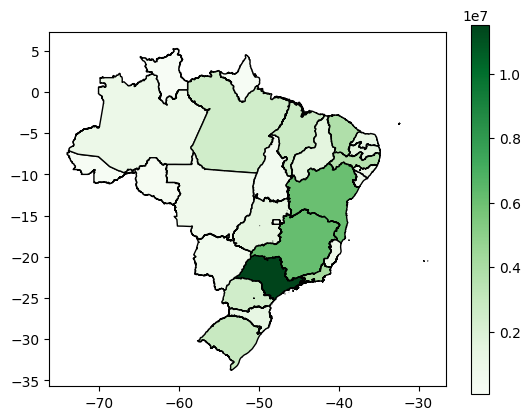

In [17]:
mapa_br.plot(column='VOTOS_LULA', legend=True, cmap='Greens', edgecolor='black')